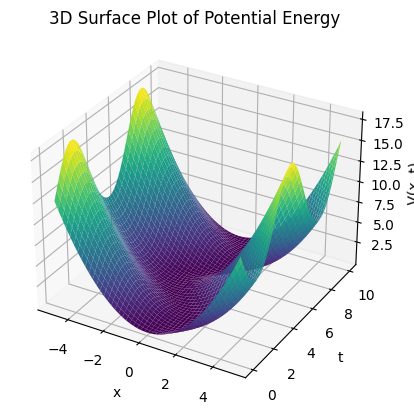

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
m = 1.0  
w = 1  
t = np.arange(0, 10, 0.01)  
x = np.linspace(-5, 5, 100)  
X, T = np.meshgrid(x, t)
V = 0.5 * m * w**2 * (X - np.sin(w * T))**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, V, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('V(x, t)')
ax.set_title('3D Surface Plot of Potential Energy')
plt.show()



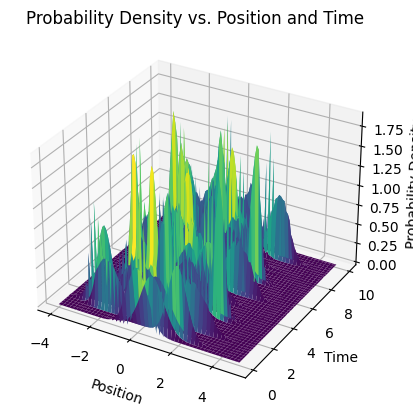

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
N = 100  
L = 4.0  
dx = 2.0 * L / N
x = np.linspace(-L, L + 1 - dx, N)
V0 = 1  
omega = 5  
T = 10.0  
dt = 0.1
m = 1

#  potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 * (x - np.sin(omega * t)) ** 2

#  kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    return np.exp(-1j * kx ** 2 * dt / 2.0)

# the potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# here initilization  wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x=x))

#  here Time evolution using split-operator method is done 
num_steps = int( T / dt)

#here i have  Create a figure and 3D axis for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#   here Initialize arrays to store position, time, and probability density data
X, Y = np.meshgrid(x, np.linspace(0,  T, N))  # Using the same time scale as in the previous code
Z = np.zeros_like(X)

for step in range(num_steps):
    #here Calculating potential at the current time step
    t = step * dt
    V = potential(x, t)
    
    # Calculating kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculating potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculating kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculating and storeing the probability density
    prob_density = np.abs(psi) ** 2
    Z[step, :] = prob_density

# Creating the 3D surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Probability Density')
ax.set_title("Probability Density vs. Position and Time")

plt.show()


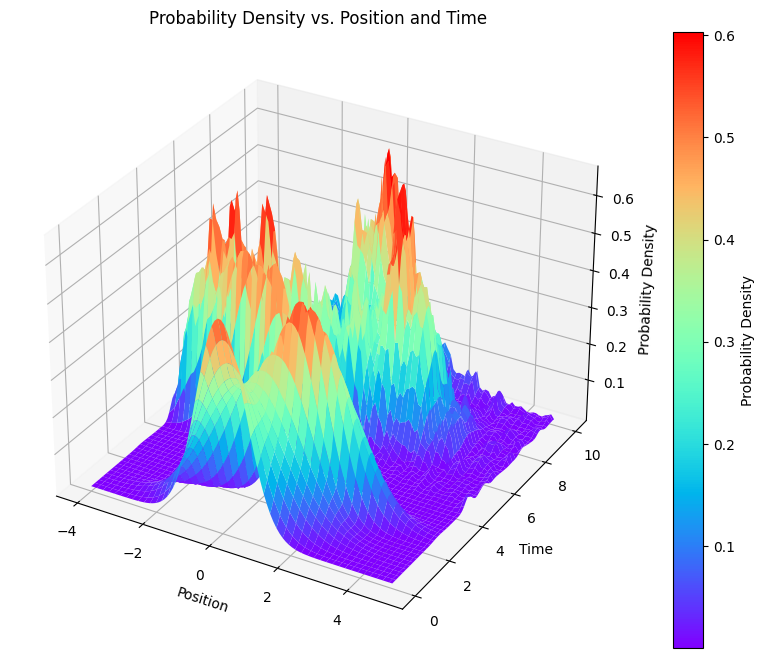

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 100
L = 4.0
dx = 2.0 * L / N
x = np.linspace(-L, L + 1 - dx, N)
V0 = 1
omega = 1
T = 10.0
dt = 0.01
m = 1

# Potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 * (x - np.sin(omega * t)) ** 2

# Kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    return np.exp(-1j * kx ** 2 * dt / 2.0)

# Potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# Initializing the wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x))  # Normalize the initial wavefunction

# Time evolution using split-operator method
num_steps = int(T / dt)

# Creating a figure and 3D axis for plotting
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')

# Initializing arrays to store position, time, and probability density data
X, Y = np.meshgrid(x, np.linspace(0, T, N))  # Using the same time scale as in the previous code
Z = np.zeros_like(X)

for step in range(num_steps):
    # Calculating potential at the current time step
    t = step * dt
    V = potential(x, t)
    
    # Calculating kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculating potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculating kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Normalizing the wavefunction
    psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x))
   
    # Calculating and storing the probability density
    prob_density = np.abs(psi) ** 2
    Z[step, :] = prob_density

# Creating the 3D surface plot
p =ax.plot_surface(X, Y, Z, cmap='rainbow')
plt.colorbar(p,label = 'Probability Density')
ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Probability Density')
ax.set_title("Probability Density vs. Position and Time")

plt.show()
